# 日收盘价数据预处理

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np

In [25]:
stocks_daily_price = pd.read_excel('五只股票前复权收盘价数据.xlsx')

stocks_daily_price.head()
# stocks_daily_price.columns

,日期,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
0,2019-04-22,66.2807,51.2235,82.8779,79.8830,17.1351
1,2019-04-23,67.0859,49.0938,80.9156,78.0099,17.0999
2,2019-04-24,69.4538,48.6102,77.8674,79.0199,16.5866
3,2019-04-25,68.7731,48.9171,79.4712,78.0741,16.6218
4,2019-04-26,67.5652,47.8104,78.7938,76.5775,16.5585


In [26]:
stocks_daily_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   日期             747 non-null    datetime64[ns]
 1   泸州老窖000568.SZ  747 non-null    float64       
 2   美的集团000333.SZ  747 non-null    float64       
 3   宁德时代300750.SZ  747 non-null    float64       
 4   中国平安601318.SH  747 non-null    float64       
 5   隆基绿能601012.SH  747 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 35.1 KB


可知，并不需要进行缺失值处理。

In [27]:
stocks_daily_price.index=pd.DatetimeIndex(stocks_daily_price.日期) # 日期索引变换

stocks_daily_price.drop(labels=['日期'],axis=1,inplace=True)

stocks_daily_price.head()

,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
日期,,,,,
2019-04-22,66.2807,51.2235,82.8779,79.8830,17.1351
2019-04-23,67.0859,49.0938,80.9156,78.0099,17.0999
2019-04-24,69.4538,48.6102,77.8674,79.0199,16.5866
2019-04-25,68.7731,48.9171,79.4712,78.0741,16.6218
2019-04-26,67.5652,47.8104,78.7938,76.5775,16.5585


通过上一步的处理，我们将日期挪到了索引里，这方便我们后面的研究。（如画图）

# 股票数据可视化

Text(0, 0.5, '股票价格')

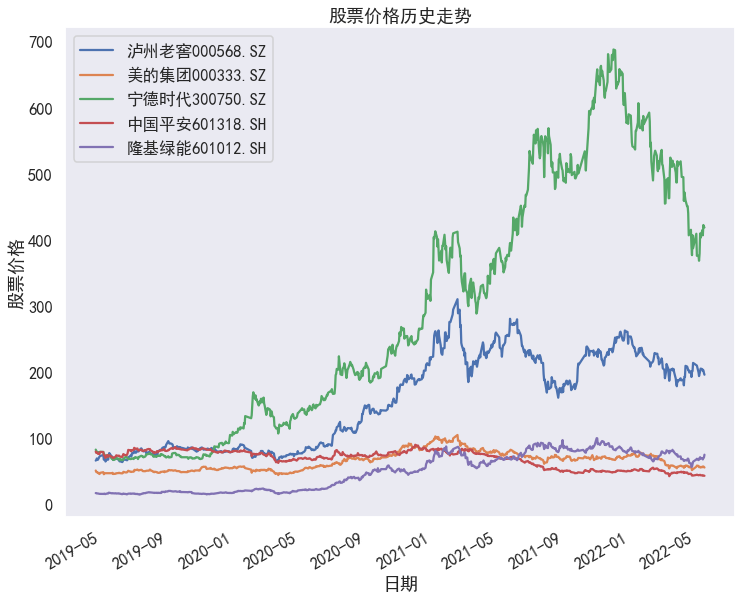

In [21]:
seaborn.set_style("darkgrid")
seaborn.set(font="SimHei")
seaborn.set_context("talk")
plt=stocks_daily_price.plot(figsize=(12,10),title="股票价格历史走势",grid=False)
plt.set_xlabel('日期')
plt.set_ylabel('股票价格')

可以看到五家公司股票的走势的总体趋势类似，表明它们的股价都受到了同样的宏观因素的冲击，比如政府推行的减税政策对于全行业来说都是一个利好消息。但是股票肯定也会有一些公司层面的独特风险，比如公司的经营策略等，构建投资组合的目的就是为了降低公司层面的独特性风险。

# 日收益率计算

In [23]:
stocks_daily_return = np.log(stocks_daily_price)-np.log(stocks_daily_price.shift(1)) 
stocks.dropna(inplace=True)
stocks.head()

C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\24450\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,泸州老窖000568.SZ,美的集团000333.SZ,宁德时代300750.SZ,中国平安601318.SH,隆基绿能601012.SH
日期,,,,,
2019-06-12,1.278371,0.959302,-0.121325,0.238480,-0.607734
2019-09-03,-1.382411,0.512428,-0.557929,0.633168,inf
2020-03-26,-0.301190,-0.024360,0.775872,-0.473520,1.835814
2020-04-02,-2.228204,-0.728511,-4.684729,2.012966,1.840629
2020-04-03,0.765391,0.858899,5.753196,0.843797,0.157160
